# Assignment 1

Abdul Azis <br>
PYTN-KS09-009

In [1]:
# useful for data processing
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# for plotting data 
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt

# for converting images into arrays and generating word cloud images
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS

# for visualizing data on an interactive Leaflet map
import folium
from folium import plugins

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
# persiapan data frame berdasarkan bulan
df_month = df.pivot_table(index='month', columns ='borough', values='value', aggfunc=sum)
df_month.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
month,,,,,,,,,,,,,,,,,,,,,
1,12610,17550,9576,18744,15770,22288,58,22198,20398,15888,...,9595,21612,15637,7843,22776,8241,17762,16792,16402,37928
2,12193,16659,8959,17535,14684,21332,56,19986,19629,15667,...,9067,20462,14521,7315,21518,8043,16958,15673,15902,34713
3,13451,18447,10133,19296,15843,24027,49,22015,21401,16966,...,9929,22749,16282,8279,23301,8970,18988,17396,17370,38349
4,12323,17421,9179,18026,14714,22305,53,20954,20416,15731,...,9372,20887,14574,7905,22248,8498,18322,16748,16464,35934
5,12844,17999,9903,19718,15785,24181,61,22169,22067,16680,...,10036,21901,15359,8819,24127,8669,19821,17669,17690,37661


In [4]:
# persiapan data frame berdasarkan tahun
df_year = df.pivot_table(index='year', columns ='borough', values='value', aggfunc=sum)
df_year.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226


In [5]:
# persiapan data frame berdasarkan kejahatan minor
df_minor = df.pivot_table(index='year', columns ='minor_category', values='value', aggfunc=sum)

# A. Area Plot

In [6]:
df_year['total'] = df_year.sum(axis=1)
df_year.sort_values(['total'], ascending=False, axis=0, inplace=True)
df_year.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,total
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,29752,20873,11106,33470,12943,23578,24080,23330,47846,738641
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,30067,21424,11168,30737,10948,26784,22647,24457,59226,737329
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,30090,19502,11074,31636,10658,29253,20716,23679,48330,736121
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,27978,21994,10896,30723,11068,24712,23714,21384,54243,724915
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,28610,20837,10618,30623,12240,21959,24761,23021,48456,717214


In [7]:
df_year_t = df_year.transpose()
df_year_t = df_year.loc[[2011, 2012, 2013], :]
df_year_t.transpose()
df_year_t = df_year_t.head(3)
df_year_t = df_year_t.loc[:,['Barking and Dagenham', 'Barnet', 'Bexley']]
df_year_t.head()

borough,Barking and Dagenham,Barnet,Bexley
year,,,
2011,16686,24007,11325
2012,15990,23573,11669
2013,15759,22510,11552


### Visualisasi Data

**Question:** Visualisasikan 3 wilayah paling sering terjadi kejahatan?

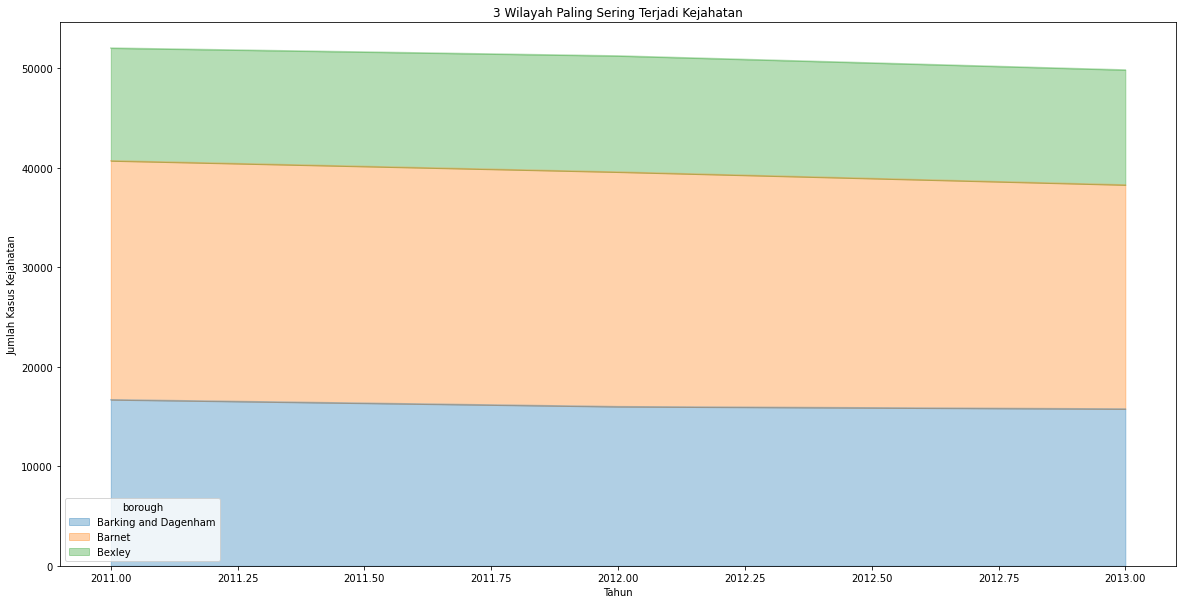

In [8]:
# option 2: preferred option with more flexibility
ax = df_year_t.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('3 Wilayah Paling Sering Terjadi Kejahatan')
ax.set_ylabel('Jumlah Kasus Kejahatan')
ax.set_xlabel('Tahun')

plt.show()

# B. Histogram

**Question:** Bagaimana distribusi frekuensi 5 kasus kejahatan tertinggi untuk setiap wilayah pada tahun 2008-2013?

In [9]:
df_year_tn = df_year.transpose()
df_year_tn = df_year.loc[[2008, 2009, 2010, 2011, 2012, 2013], :]
df_year_tn.transpose()
df_year_tn = df_year_tn.head(6)
df_year_tn = df_year_tn.loc[:,['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden']]
df_year_tn

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden
year,,,,,,
2008,17656,23944,15305,23504,24015,32010
2009,17713,23449,14445,24748,21858,31612
2010,17130,23416,13166,25512,19572,31804
2011,16686,24007,11325,27669,19868,33956
2012,15990,23573,11669,26357,19622,31472
2013,15759,22510,11552,23759,18945,28435


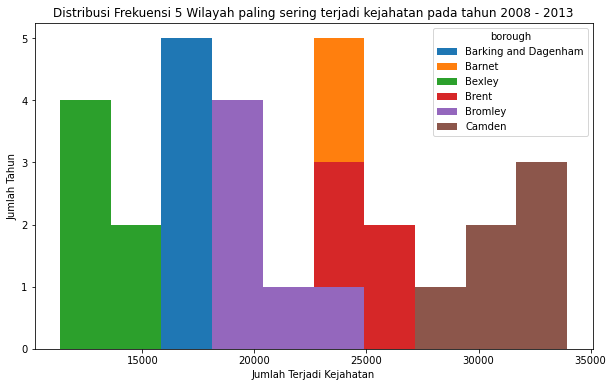

In [10]:
# generate histogram
df_year_tn.plot(kind='hist', figsize=(10, 6))

plt.title('Distribusi Frekuensi 5 Wilayah paling sering terjadi kejahatan pada tahun 2008 - 2013')
plt.ylabel('Jumlah Tahun')
plt.xlabel('Jumlah Terjadi Kejahatan')

plt.show()

# C. Bar Chart

Question: Bagaimana visualisasi dari wilayah yang sering terjadi kejahatan pada tahun 2009?

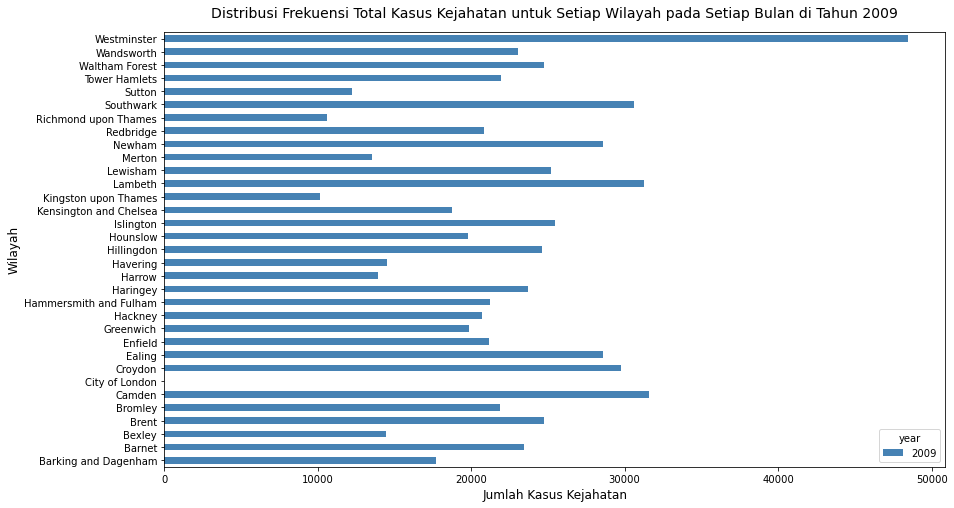

In [11]:
df_year.head()
dfvis = df_year.drop('total', axis = 1)
dfvis = dfvis.transpose()
dfvis.drop([2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016], axis = 1, inplace = True)
dfvis.plot(kind='barh', figsize=(14, 8), color='steelblue')
plt.xlabel('Jumlah Kasus Kejahatan', fontsize = 12)
plt.ylabel('Wilayah', fontsize = 12)
plt.title('Distribusi Frekuensi Total Kasus Kejahatan untuk Setiap Wilayah pada Setiap Bulan di Tahun 2009', fontsize = 14, y = 1.02)
plt.show()

# D. Pie Chart

**Question:** Bagaimana persentase ketegori kejahatan minor yang terjadi pada tahun 2008 - 2016?

In [12]:
df_minor.head()

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other Theft Person,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH
year,,,,,,,,,,,,,,,,,,,,,
2008,56586,31437,56655,2964,37356,3840,23519,41693,9011,4203,...,24453,7721,26663,64228,268,76570,32857,28303,15895,8701
2009,55297,30434,60185,3115,39671,0,22475,36621,8348,4172,...,27549,7571,26453,56070,0,68856,36349,24476,20721,10005
2010,54173,29703,57123,3041,41591,0,20253,32907,7962,4252,...,29547,6947,29300,54026,0,69709,36935,24890,19726,8033
2011,50768,30876,62439,2685,40502,0,18037,29494,7445,4460,...,36090,6414,33994,52769,0,69604,36351,26161,20885,7628
2012,50369,31676,61716,2450,39246,0,15330,25777,6753,3964,...,46585,6623,32810,47491,0,68198,36562,22464,21339,7151


In [13]:
df_minor['total'] = df_year.sum(axis=1)
df_minor.head()

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH,total
year,,,,,,,,,,,,,,,,,,,,,
2008,56586,31437,56655,2964,37356,3840,23519,41693,9011,4203,...,7721,26663,64228,268,76570,32857,28303,15895,8701,1477282
2009,55297,30434,60185,3115,39671,0,22475,36621,8348,4172,...,7571,26453,56070,0,68856,36349,24476,20721,10005,1434428
2010,54173,29703,57123,3041,41591,0,20253,32907,7962,4252,...,6947,29300,54026,0,69709,36935,24890,19726,8033,1430648
2011,50768,30876,62439,2685,40502,0,18037,29494,7445,4460,...,6414,33994,52769,0,69604,36351,26161,20885,7628,1449830
2012,50369,31676,61716,2450,39246,0,15330,25777,6753,3964,...,6623,32810,47491,0,68198,36562,22464,21339,7151,1474658


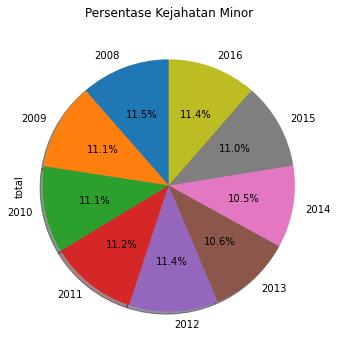

In [14]:
# autopct create %, start angle represent starting point
df_minor['total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Persentase Kejahatan Minor')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

# E. Box Plot

**Question:** Bagaimana hubungan antara total kejahatan per bulan untuk setiap tahun?

In [15]:
# Menampilkan 5 baris pertama dengan kasus kejahatan tertinggi pada setiap wilayah
df_month.head()
dfbox = df_month.transpose()
dfbox.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
borough,,,,,,,,,,,,
Barking and Dagenham,12610,12193,13451,12323,12844,12451,13205,12315,11883,12203,12572,11397
Barnet,17550,16659,18447,17421,17999,17908,18297,16775,16902,18398,18523,17312
Bexley,9576,8959,10133,9179,9903,9492,9805,9063,9053,9783,9929,9261
Brent,18744,17535,19296,18026,19718,19342,19698,18478,18184,20189,20033,18308
Bromley,15770,14684,15843,14714,15785,15159,16164,14703,14616,15757,15749,15405


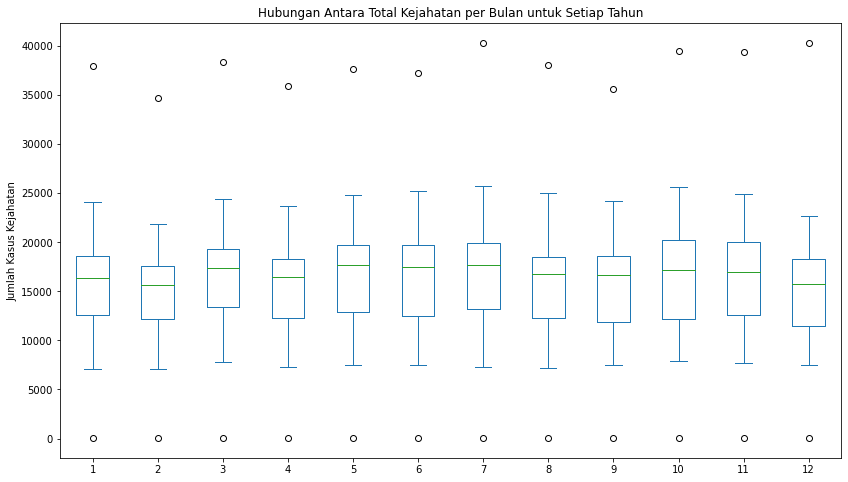

In [16]:
### type your answer here
dfbox.plot(kind='box', figsize=(14, 8))

plt.title('Hubungan Antara Total Kejahatan per Bulan untuk Setiap Tahun')
plt.ylabel('Jumlah Kasus Kejahatan')

plt.show()

# F. Scatter Plot

**Question:** Bagaimana hubungan antara total kejahatan per bulan untuk setiap tahun?

In [17]:
df_year.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,total
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,29752,20873,11106,33470,12943,23578,24080,23330,47846,738641
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,30067,21424,11168,30737,10948,26784,22647,24457,59226,737329
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,30090,19502,11074,31636,10658,29253,20716,23679,48330,736121
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,27978,21994,10896,30723,11068,24712,23714,21384,54243,724915
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,28610,20837,10618,30623,12240,21959,24761,23021,48456,717214


In [18]:
dfsk = df_year.copy()
dfsk.reset_index(inplace = True)
dfsk['Total'] = dfsk.sum(axis=1)
dfsk = dfsk.loc[:,['year', 'Total']]
dfsk.head()

borough,year,Total
0,2008,1479290
1,2012,1476670
2,2016,1474258
3,2011,1451841
4,2009,1436437


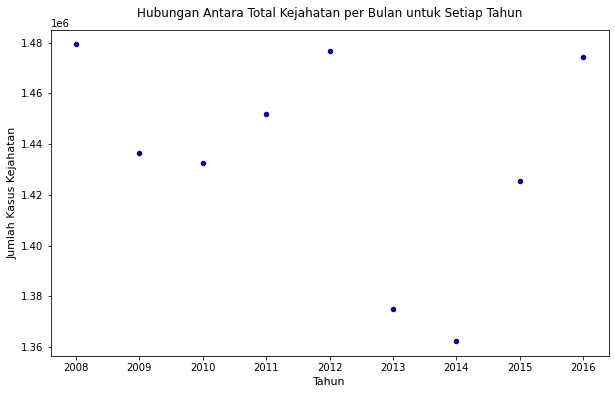

In [19]:
dfsk.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='darkblue')

plt.title('Hubungan Antara Total Kejahatan per Bulan untuk Setiap Tahun', y=1.02)
plt.xlabel('Tahun', fontsize = 11)
plt.ylabel('Jumlah Kasus Kejahatan', fontsize = 11)

plt.show()

# G. Word Cloud

**Question:** Kejahatan mayor apa yang sering terjadi pada tahun 2010?

In [20]:
# prepare data
df_kat1 = df.loc[:,['major_category', 'year']]
df_kat = df_kat1[df_kat1['year'] == 2010]
df_kat = df_kat.drop('year', axis = 1)
df_kat2 = df['major_category']
df_kat_str = df_kat2.astype(str)

In [21]:
stopwords = set(STOPWORDS)

In [22]:
word_string=" ".join(df['major_category'])

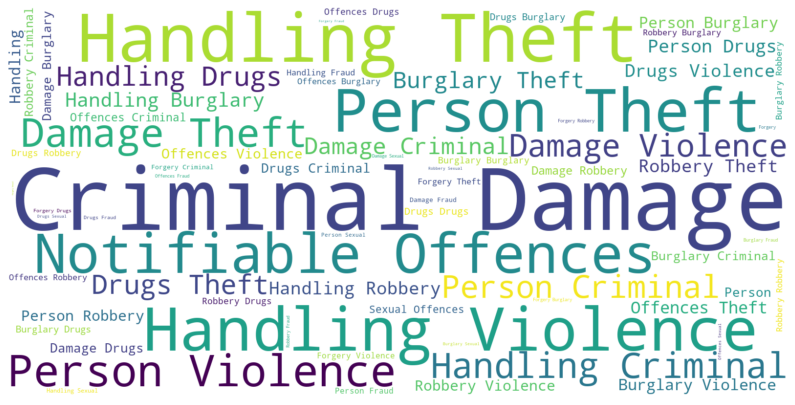

In [23]:
plt.figure(figsize=(14,14))
# instantiate a word cloud object
wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
# generate the word cloud
wc.generate(word_string)

plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

# H. Folium Maps

**Question:** Buatlah peta Leaflet di London dengan zoom start = 8!

In [24]:
# London latitude and longitude values
latitude = 51.509865
longitude = -0.118092

In [25]:
# create map and display it
peta_london = folium.Map(location=[latitude, longitude], zoom_start=8)

# display the map of London
peta_london